# 성능평가 척도(Evaluation Metric)

 학습을 완료한 모델의 성능과 완성도를 평가하여 모델이 충분히 완성되었다고 판단할 수 있는 기준 즉, 척도를 판단해야 한다.   
 따라서, 다양한 성능평가 척도(Evaluation Metric)가 있고, 하나에 문제에서도 목적에 따라 여러 척도를 사용할 수 있다.

### 학습 내용
2. Loss와 Metric
  + Loss와 Metric의 차이는 무엇일까요?
3. Confusion Matrix 와 Precision/Recall
  + Confusion Matrix 와 Precision/Recall의 개념에 대해 알아봅니다.
4. Threshold의 변화에 따른 모델 성능
  + Threshold를 변경하며 모델 성능을 확인하는 실습을 해봅니다.
5. Precision-Recall 커브
  + Precision-Recall 커브를 직접 코드로 그려보며 알아봅니다.
6. ROC 커브
  + ROC 커브에 대해 살펴봅니다.
7. 다양한 머신러닝 모델의 평가척도
  + 이외에도 몇 가지 평가척도에 대해 살펴봅니다.

### 학습 목표
1. 머신러닝 학습 결과를 평가할 수 있습니다.
2. Precision과 Recall의 관계를 이해할 수 있습니다
3. AUC 영역을 통해 모델 간의 퍼포먼스를 비교할 수 있습니다.


## 9-2. Loss와 Metric

* Loss : 모델 학습시 **학습데이터(train data)** 를 바탕으로 계산되어, 모델의 파라미터 업데이트에 활용되는 함수
* Metric : 모델 학습 종료 후 **테스트데이터(test data)** 를 바탕으로 계산되어, 학습된 모델의 성능을 평가하는데 활용되는 함수

----------
**Q_9.2 왜 Accuracy가 학습단계에 좋은 Loss가 될 수 없는가?**   
  불연속적인 Accuracy는 연속적인 Cross Entropy에 비해, 파라미터가 학습되어야 할 방향을 정확하게 제시하지 못한다.

----------
> *즉, 우리가 해결해야 할 문제에 어떤 Loss나 Metric이 적당한지를 판단하는 직관력을 키워야 한다.*





## 9-3. Confusion Matrix 와 Precision/Recal

**혼동행렬(Confusion Matirx)**
 모델의 결과가 이진 분류되는 형태일 때, 모델의 예측 결과와 실제 정답셋을 비교하여 표현하는 행렬.

 

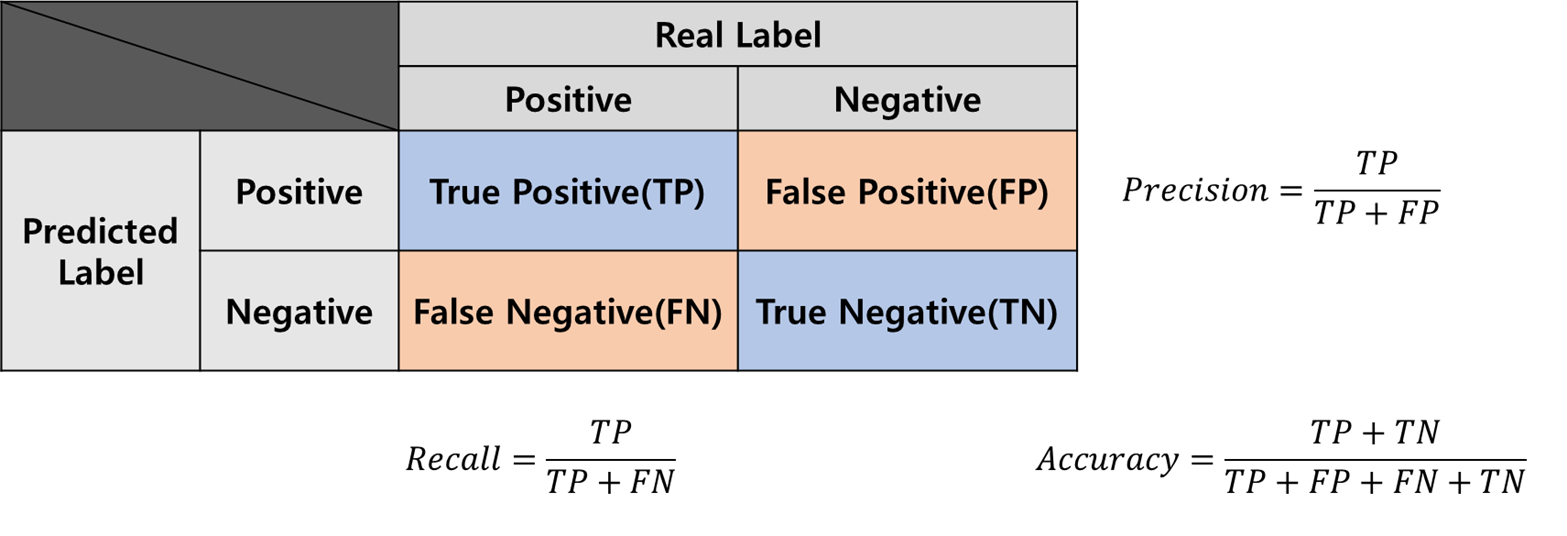

- True Positive(TP) : 실제 Positive인 정답을 Positive라고 예측 (True)
- False Positive(FP) : 실제 Negative인 정답을 Positive라고 예측 (False)
- False Negative(FN) : 실제 Positive인 정답을 Negative라고 예측 (False)
- True Negative(TN) : 실제 Negative인 정답을 Negative라고 예측 (True)

2. 정밀도(Precision)  
모델이 Positive로 예측한 결과 중 실제 Positive인 결과의 비율이다. 즉, FP를 줄이는 것에 초점을 둔다.  
$$Precision=\frac{TP}{TP+FP}$$  

3. 재현율(Recall)  
실제로 Positive한 결과 중 모델이 Positive로 예측한 결과의 비율이다. 즉, FN을 줄이는데 초점을 주며, True Positive Rate(TPR)또는 민감도(Sensitivity)라고도 한다.  
$$Recall=\frac{TP}{TP+FN}$$  

4. 정확도(Accuracy)  
정확하게 예측한 데이터 개수를 총 데이터 개수로 나눈것이다.  
$$Accuracy=\frac{TP+TN}{TP+FN+FP+TN}$$ 
정확도는 실제 데이터 비율에 영향을 많이 받는 치명적인 단점이 있다. 전체 데이터 중 99%가 Posotive인 데이터가 있고, 모델이 데이터 전부를 Positive라고 예측하더라도 99%의 정확도를 나타낸다.

5. F-Score  
앞서 정밀도와 재현율은 Trade-off 관계가 있다. 이러한 관계는 정밀도가 좋아지면 재현율이 나빠지고, 정밀도가 나빠지면 재현율이 좋아지는 관계이다.
이를 적절히 고려하여 종합적인 분석를 하기 위한 평가이다.
$$F_{\beta} Score=(1+\beta^2)\cdot \frac{precision\times recall}{(\beta^2 ̈\cdot precision) + recall}$$ 

$\beta$는 재현율과 정밀도의 중요도에 따라 달리할 수 있다. 1을 기준으로 크게 한다면 재현울(recall)에 비중을 작게 한다면 정밀도(precision)에 중점을 둔다.


## 9-4. Threshold의 변화에 따른 모델 성능

**Threshold**의 의미는 분류의 기준이다. Threshold를 고려한 전체적인 모델의 성능을 평가하는 방법으로는 **PR(Precision and Recall) Curve**와 **ROC(Receiver Operating Characteristic) Curve**를 그려보는 방법이 있다.



In [ ]:
# 붓꽃 데이터 불러오기
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)

(150, 4)


In [ ]:
# 붓꽃 데이터에 noise 추가하기
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape # 샘플의 개수와 특징의 개수를 변수에 저장
X = np.c_[X, random_state.randn(n_samples, 200*n_features)]

# (150,4)이었던 데이터에 (150,800)의 랜덤한 노이즈 데이터를 추가.
print(X.shape) 

(150, 804)


In [ ]:
print(y<2) # 150개의 데이터 중 0,1,2 클래스 중에서 0,1 클래스만 사용용

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


In [ ]:
## 원래의 붓꽅 데이터는 3개의 class가 있지만 이진분류로 줄여 진행
X_train, X_test, y_train, y_test = train_test_split(X[y<2], y[y<2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


In [ ]:
## SVM(Support Vector Machine)모델을 사용
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train,y_train)

classifier.score(X_test, y_test)

0.48

In [ ]:
## SVM의 커널을 변경해 진행
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)

0.8

In [ ]:
print("예측 결과 : \n",classifier.predict(X_test))
print('------------------------------------------')
print("라벨 : \n", y_test)

예측 결과 : 
 [0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 1 1 0 1 1 1 0 1]
------------------------------------------
라벨 : 
 [1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 1 1 0 1 1 0 1 0]


In [ ]:
## 모델 끝에 Softmax가 있어 확률값을 출력하는 Logistic Regression 모델과는 달리,
#  SVM은 별도의 `decision_funtion()함수가 있다.
y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



In [ ]:
## 기존 0보다 큰 출력값을 양성으로 분류 했다면
#  -0.1 보다 큰 출력값을 양성으로 분류하도록 설정
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

# 위의 -0.1로 설정한 Thrashold를 변경하며 metrics가 어떻게 변하는지 확인

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



## 9-5. Precision-Recall 커브

**PR(Precision-Recall) 커브**는 Recall을 X축, Precision을 Y축에 놓고 Threshold 변화에 따른 두 값의 변화를 그래프로 그린 것

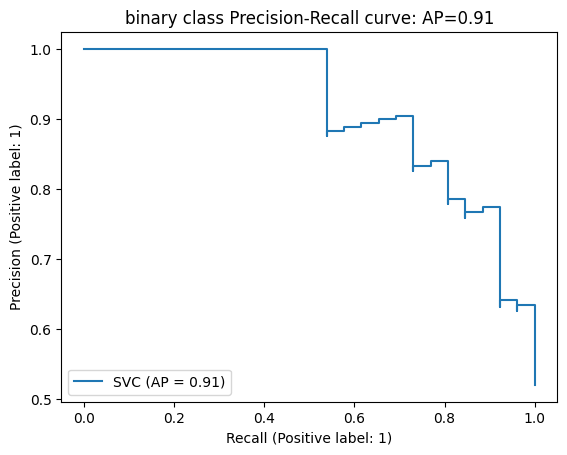

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(disp.average_precision))

plt.show()

위 코드로 볼 수 있는 PR Curve를 보면 Precision과 Recall간의 트레이드오프 관계 즉, 서로 커지면 작아지고 작아지면 커지는 관계를 볼 수 있다. 

따라서, 위 그래프의 선 아래의 면적을 구하는 AUC(Area Under Curve)값을 활용하여 성능을 평가한다. PR AUC를 계산하는 방법으로 다음과 같이 사이킷런에서 제공하는 `average_precision_score` 함수를 사용한다.
$$
\text{AP} = \displaystyle\sum_{n}{(R_n - R_{n-1})P_n}
$$

> 위 수식의 특성을 살펴보면, average_precision_score(AP) 값은, n 값을 무한히 크게 한다면 아주 작은 Recall 구간에 대해 Pn 값을 적분하는 것과 같게 됩니다. 그러므로 PR 커브의 아래쪽 면적인 PR AUC와 같은 의미가 되겠군요. 하지만 사이킷런 문서에서는 average_precision_score와 PR AUC가 구현 측면에서 약간 다르다고 설명하고 있습니다. 두 개념이 의미적으로 비슷하게 사용될 수 있다고만 이해하면 될 것 같습니다.

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


평균 precision-recall score: 0.90


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.90')

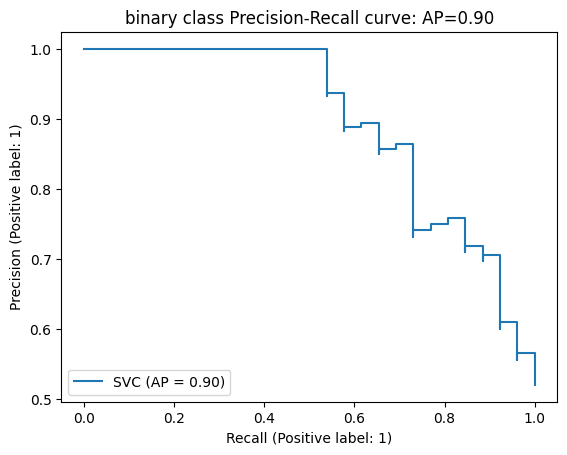

In [ ]:
# Q. 모델을 SVM의 'poly' 커널을 사용하여 average_precision_score를 구하세요.
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## 9-6. ROC 커브

**ROC(Receiver Operating Characteristic Curve)**는 Confusion Matrix 
수치를 활용하여 분류능력을 표현하는 방법이다.

ROC의 축이 되는 TP Rate와 FP Rate는 다음과 같이 계산한다.
$$
\text{TP Rate(Sensitivity)} = \frac{TP}{TP+FN}$$

$$
\text{FP Rate(1-Sensitivity)} = \frac{FP}{TN+FP}$$




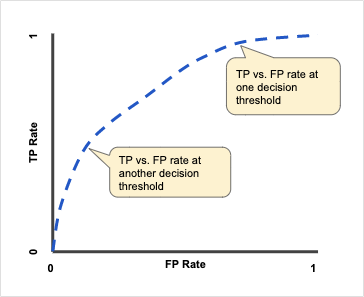

또한 ROC AUC(Area Under the ROC Curve) 또한 선 아래의 영역의 넓이를 이용하여 성능을 확인 할 수 있다.

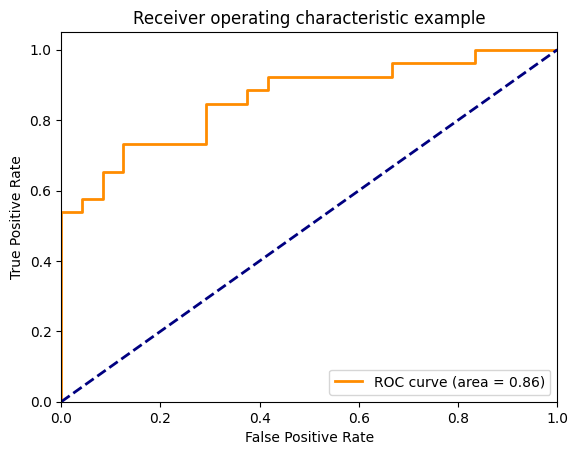

auc result:0.8605769230769231


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

In [ ]:
# SVM 커널의 종류를 바꿔 가며 ROC 커브를 그리고 ROC AUC 값을 구하는 코드를 직접 작성해보세요.
# ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

y_score = classifier.decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

## 9-7. 다양한 머신러닝 모델의 평가척도

### 회귀 모델의 평가척도

[회귀의 오류 지표 참고 사이트](https://partrita.github.io/posts/regression-error/)   

loss 함수가 테스트셋에 적용될 때 그대로 Metric이 되는 경우가 대부분입니다. 그래서 회귀 모델의 경우에는 어떤 loss가 적합한지 그 특성을 알아보는 것이 중요.

* Mean Absolute Error
* Mean Absolute Percentage Error
* Mean Square Error
* Mean Percentage Error

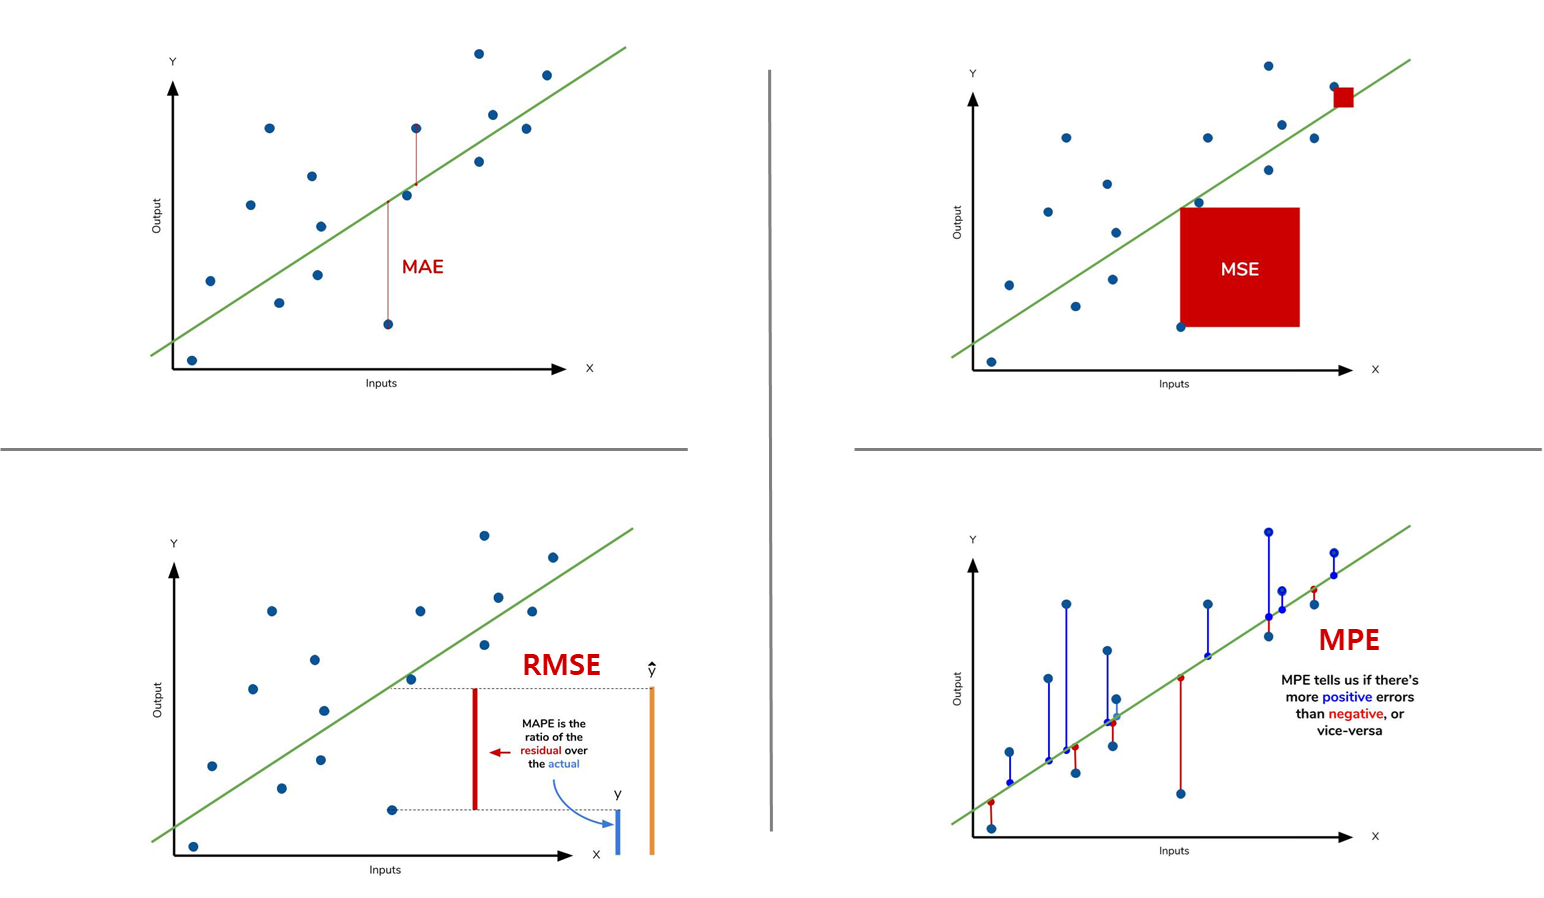

--------------
**Q_9.7.1 MSE, RMSE 등 square 계열 Metric과 MAE, MAPE 등 absolute value 계열 Metric이 특이값에 대해 어떤 차이를 보이는지 설명해 주세요.**   
MSE, RMSE는 오차의 제곱에 비례하여 수치가 늘어나므로, 특이값에 민감하게 반응하며, Outlier가 많은 데이터에 대해 모델이 강건(robust)하지 못하다. MAE, MAPE는 오차의 절대값에 비례해서 수치가 늘어나는데 상대적으로 특이값에 민감하지 않고 Outlier가 많은 데이터에 대해 강건한다.

---------------




### 랭킹 모델의 평가척도

[정보 검색(Information Retrieval) 평가는 어떻게?](https://lamttic.github.io/2020/03/20/01.html)   
 우선순위를 고려한 평가 모델인 **MRR(Mean Reciprocal Rank), MAP(Mean Average Precision), NDCG(Normalized Discounted Cumulative Gain)**

* **MRR(Mean Reciprocal Rank)**은 간단하다. 최상위 컨텐츠에만 집중하여 평가한다. 최상위 하나만 보고 평가하는 것이 장점 혹은 단점이 된다.


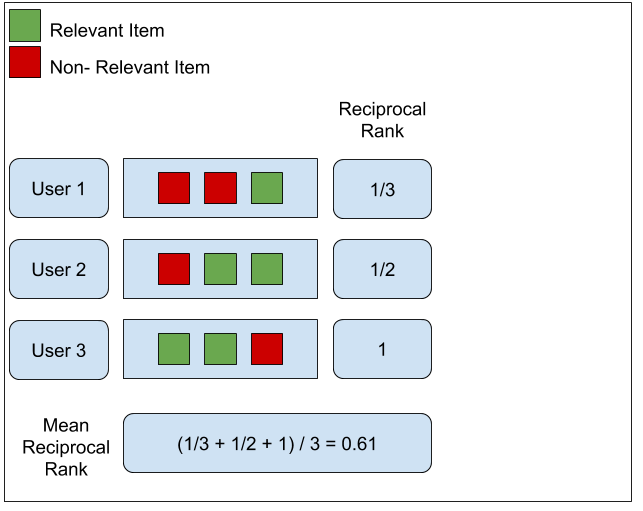


* **MAP(Mean Average Precision)**는 관련 컨텐츠가 나올 때까지의 목록을 가지고 정밀도를 구한다. 결과들의 평균을 구한다. 따라서 상위 N개의 추천 컨텐츠에 대해 평가 할 수 있다.

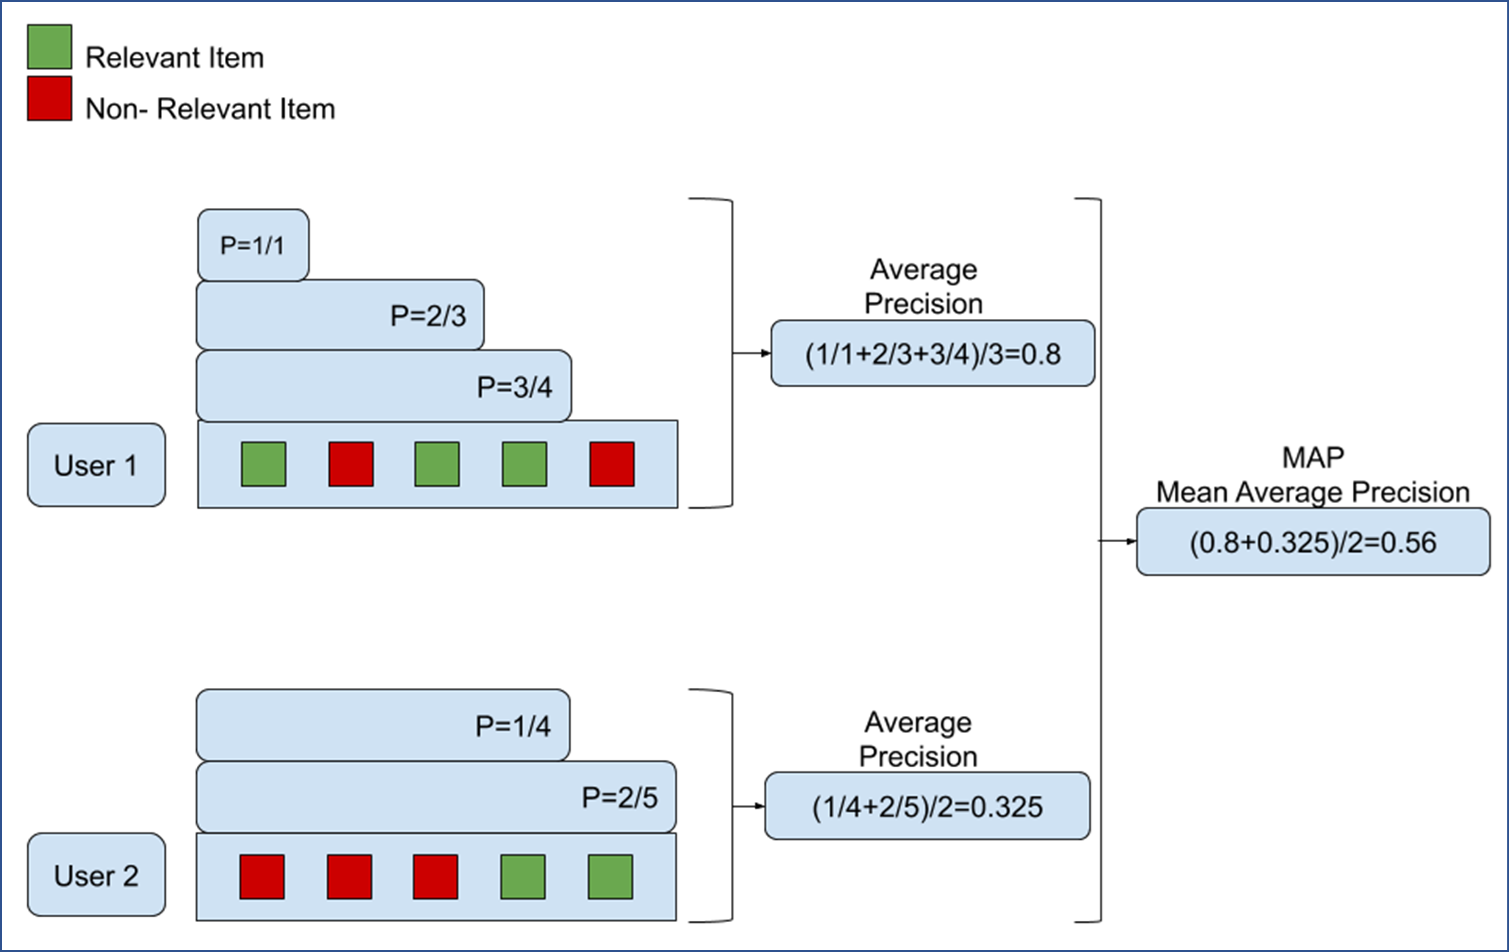

* **NDCG(Normalized Discounted Cumulative Gain)**는 MAP와 목표는 크게 다르지 않으나 더 관련있는 컨텐츠는 무었인가에 더욱 집중했다.


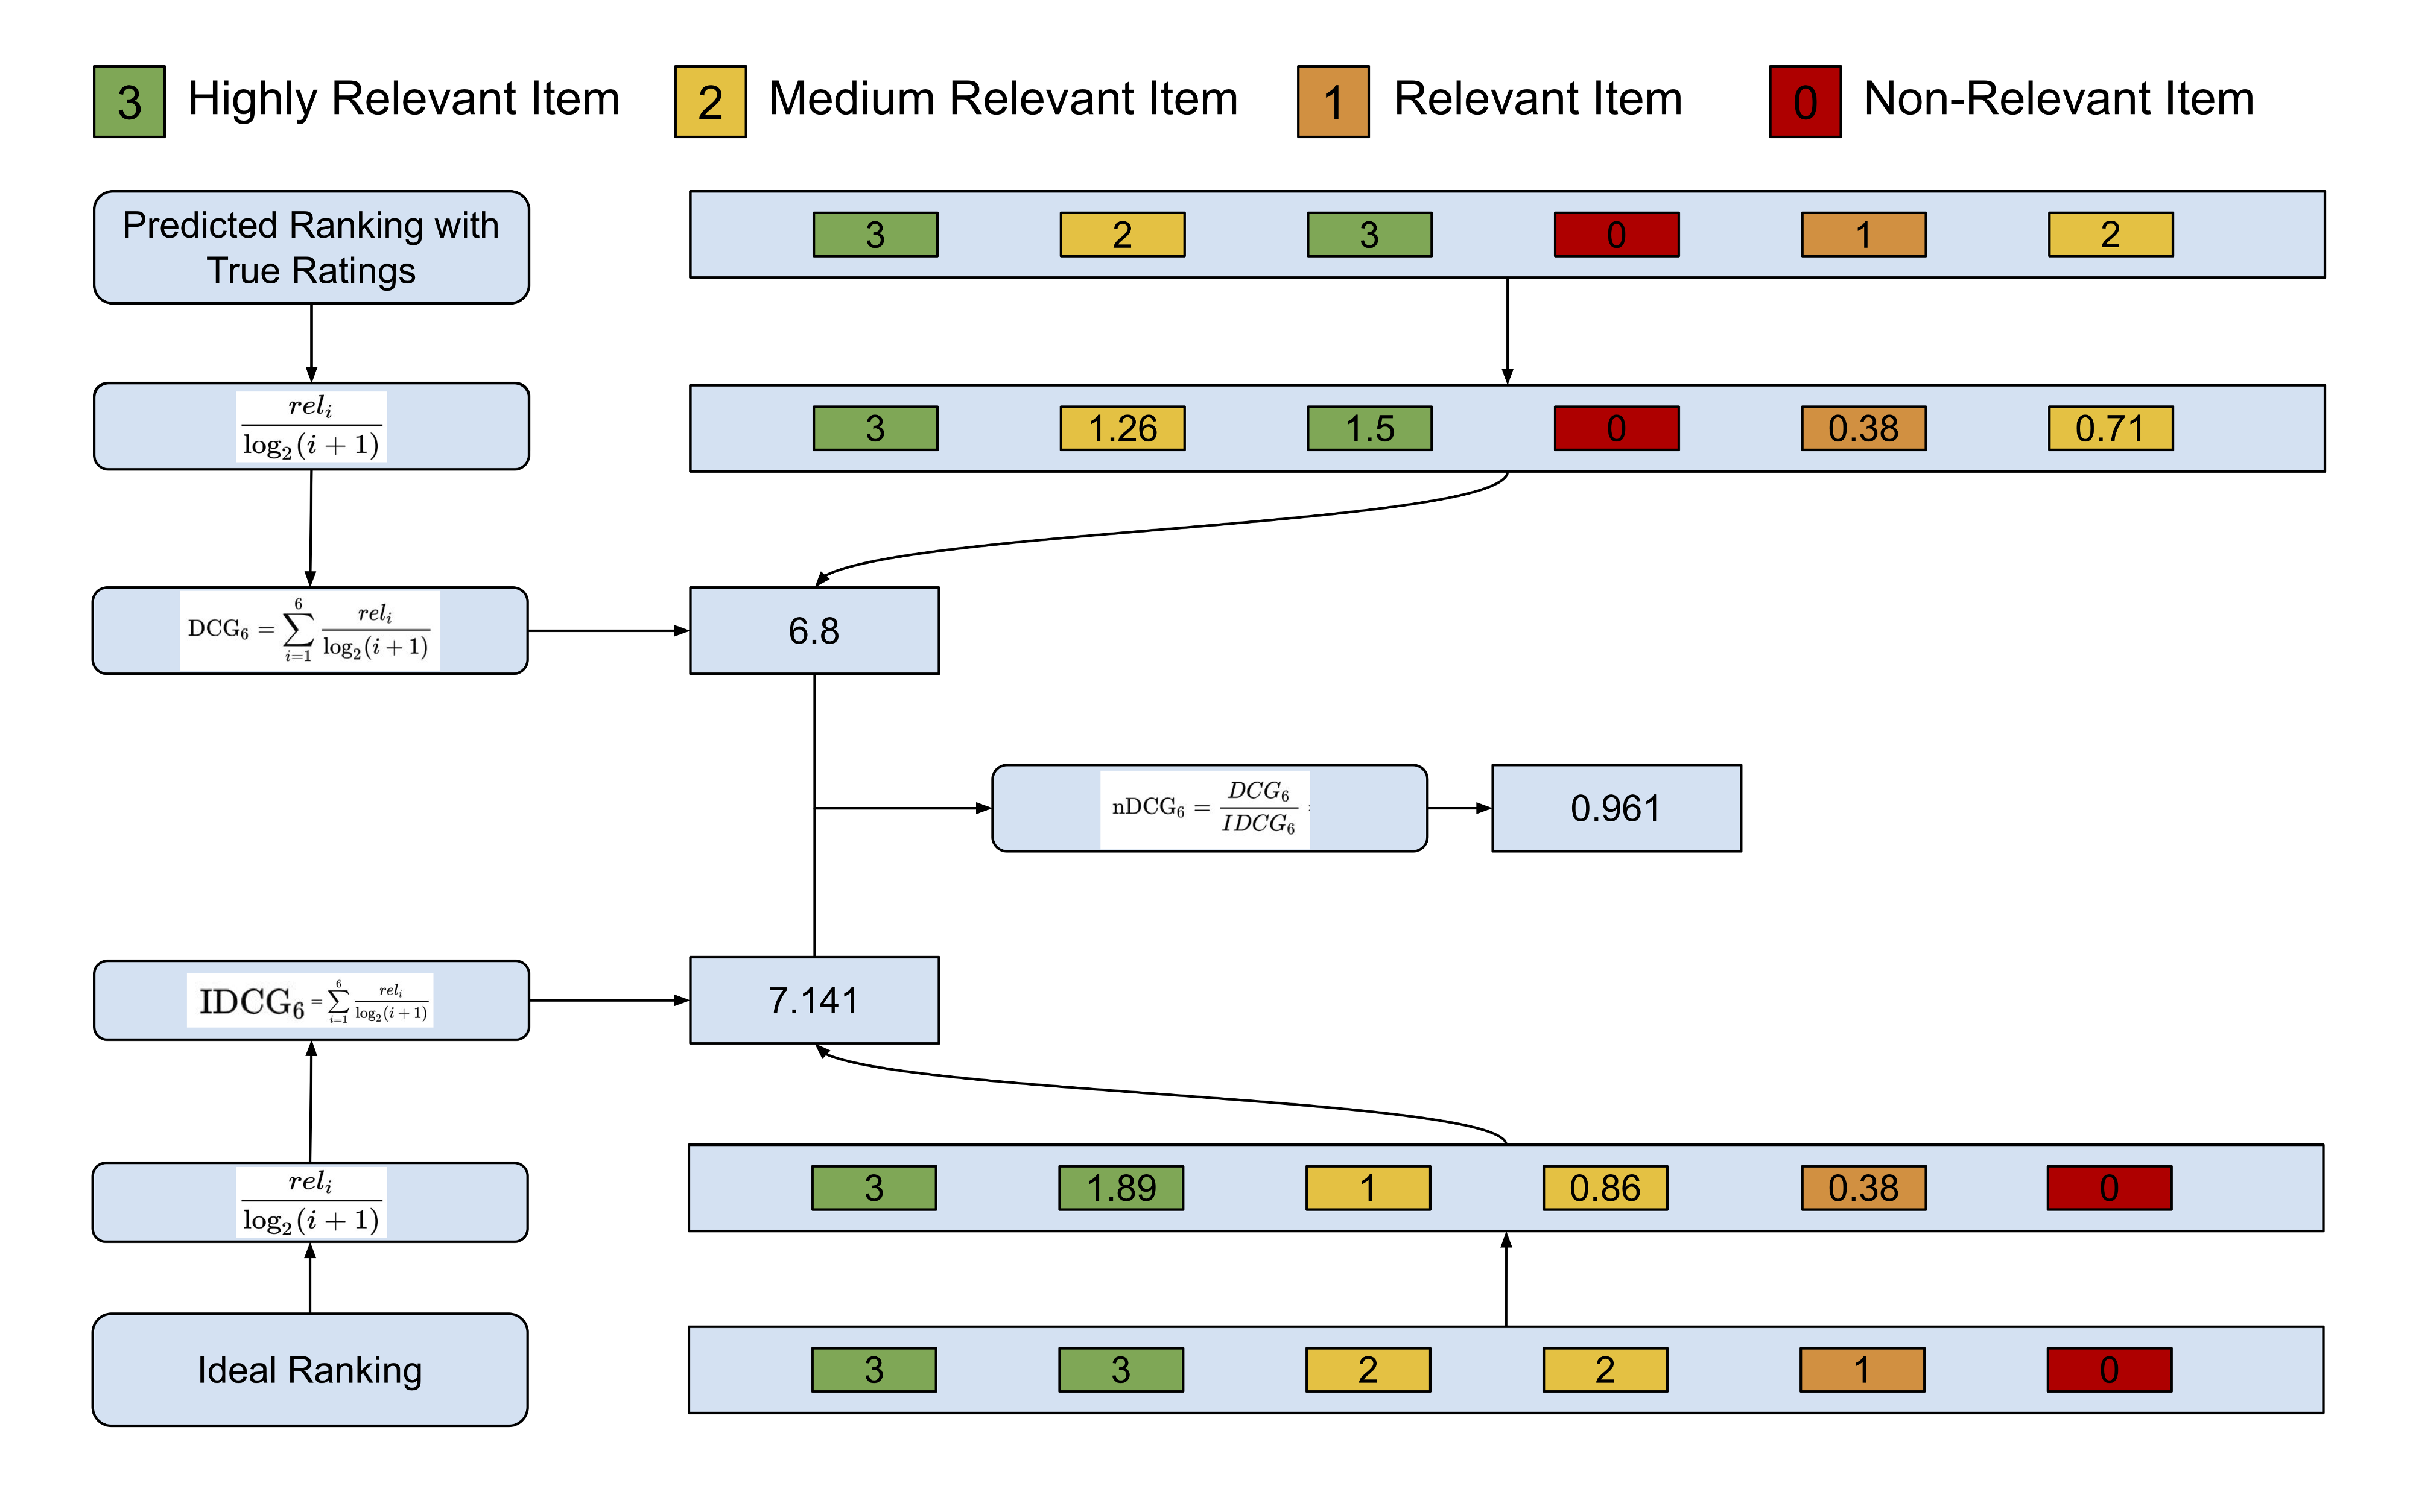

-------------
**Q_9.7.2. NDCG가 MRR, MAP 등 이전 평가척도들에 비해 어떤 부분에서 좋아졌다고 할 수 있을까요?**
A : 랭킹을 매기기 위해 임의성을 배제하고 모든 콘텐츠 아이템에 대한 관련성을 계산하여 랭킹에 반영한다.   

---------------

### 이미지 생성 모델의 평가척도

[Methods to Measure the Similarity Between Images](https://medium.com/@datamonsters/a-quick-overview-of-methods-to-measure-the-similarity-between-images-f907166694ee)


**평균 제곱 오차(MSE: Mean-Square Error)**는 예측한 값과 실제 값으로 측정합니다. 픽셀 단위로 제곱 차이를 계산합니다. 그러나 이는 실제 GT 이미지와 똑같은 이미지를 생성할 떄 더 잘 작동한다. 우리는 그림의 구조나 부조에 집중하고 싶습니다.

**PSNR(Peak Signal to Noise Ratio)**는 픽셀 표현의 모든 값을 비트 형식으로 변환해야 합니다. 예를 들어어 8비트 픽셀이 있는 경우 픽셀 채널의 값은 0에서 255 사이여야 합니다. 참고로, RGB 색상 모델은 PSNR에 가장 적합합니다. 그러나 PSNR은 MSE의 변형이며 여전히 픽셀 단위 비교에 집중합니다. 

**구조적 유사성 방법(SSIM: Structural Similarity Method)**은 인간 시각 시스템(HVS  color model)의 품질 및 인식과 관련이 있습니다. SSIM은 상관 관계 손실(loss of correlation), 휘도 왜곡(luminance distortion) 및 대비 왜곡(contrast distortion)이라는 세 가지 요인의 조합으로 사용한다.

-----------
**Q_9.7.3 MSE나 PSNR 대비 SSIM이 가지는 가장 큰 차이점은 무엇인가요?**   
MSE나 PSNR은 모두 픽셀 단위로 비교해서 거리를 측정한다. 그러나 이 방식은 이미지가 약간 평행이동해 있어도 두 차이를 크게 측정하는 단점이 있다. SSIM은 이와 달리 픽셀 단위 비교보다는 이미지 내의 구조적 차이에 집중하는 방식을 쓴다.

---------


### 기계번역 모델의 평가척도

[BLEU Score](https://donghwa-kim.github.io/BLEU.html)

* **BLEU(Bilingual Evaluation Understudy)score**는 데이터의 X가 순서정보를 가진 단어들(문장)로 이루어져 있고, y또한 단어들의 시리즈(문장)로 이루어진 경우 사용된다.
  + n-gram을 통한 순서쌍들이 얼마나 겹치는지 측정(precision)
  + 문장길이에 대한 과적합 보정 (Brevity Penalty)
  + 같은 단어가 연속적으로 나올때 과적합 되는 것을 보정(Clipping)

$$
BLEU = min(1,\frac{output length}{refernce length})(\prod^{4}_{i=1} precision_i)^{\frac{1}{4}}
$$

--------
**Q_9.7.4 BLEU score는 결국 두 텍스트가 얼마나 겹치는지를 측정하는 척도입니다. BLEU에서는 텍스트가 겹치는 정도를 어떻게 측정하나요?**   
1-gram, 2-gram, 3-gram, 4-gram이 두 문장 사이에 몇번이나 공통되게 출현하는지를 측정합니다.

--------------------

#### 종합 퀴즈
**Q1. 병원에 내원한 환자가 암인지 아닌지 구분하는 예측모델을 만들었는데, 이에 대한 정확도(Accuracy)가 어떻게 되는지 계산해봅시다.**

**TP(실제로 암이면서, 암으로 예측한 결과) = 1   
TN(실제로 정상이고, 정상으로 예측한 결과) = 90   
FN(실제로 암이지만, 예측을 정상으로 한 결과) = 8   
FP(실제로 정상이지만, 예측을 암으로 한 결과) = 1**
정확도 = (TP+TN) / (TP+TN+FN+FP) = (1+90) / (1+90+1+10) = 91%

--------------
**Q2. Precision을 높이기 위해선 TP, TN, FP, FN 중 어떤 값이 어떻게 조정되어야 하는지 이야기해 봅시다.**   
TP 개수가 커지고, FP 개수가 줄어들수록 Precision은 높아진다.

----------------
**Q3. 같은 문제를 푸는 서로 다른 모델 간 ROC 곡선과 AUC 영역을 비교하면 모델 간 성능을 비교할 수 있을까요? 가능하다면, 어떤 특성 때문에 가능한지 이야기해 봅시다.**   
AUC 값 범위는 항상 0 ~ 1 이기 때문에, 모델 종류와 관계없이 얼마나 잘 예측하는지 비교해 볼 수 있습니다.

-----------
